In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
def zscore(x):
    mean = np.mean(x,axis = 0)
    sigma = np.std(x,axis = 0)
    x_norm = (x-mean)/sigma
    return x_norm

In [37]:
def multiclass_to_binary(y):
    y = y + 1
    y_1 = set(y)
    y_1 = np.array(list(y_1))
    n = y_1.shape[0]
    m = y.shape[0]
    t = np.zeros((n,m))
    T = np.zeros((n,m))
    for i in range(n):
        t[i] = y
    for i in range(n):
        q = t[i]
        for j in range(m):
            if q[j] == y_1[i]:
                q[j] = 1
            elif q[j] < y_1[i]:
                q[j] = 0
            elif q[j] > y_1[i]:
                q[j] = 0
        T[i] = q
    return T
def predict(x,y_train):
    y_b = multiclass_to_binary(y_train)
    k = y_b.shape[0]
    m = x.shape[0]
    y_out = np.zeros((m,k))
    y_output = np.zeros(m)
    for i in range(k):
        w = parameters["w" + str(i)]
        b = parameters["b" + str(i)]
        r = np.dot(x,w) + b
        y_out[:,i] = r
    for i in range(m):
        y_output[i] = np.argmax(y_out[i,:])
    return y_output
def accuracy(y_label,y_pred):
    acc = np.mean(y_label == y_pred)*100
    return acc

In [21]:
def sigmoid(x):
    g = 1/(1 + np.exp(-x))
    return g

In [22]:
def cost_gradient(x,y,w,b):
    m = x.shape[0]
    z = np.dot(x,w) + b
    f_wb = sigmoid(z)
    f_wb_log = -(y*np.log(f_wb) + (1 - y)*np.log(1-f_wb))
    cost  = f_wb_log*y
    cost  = np.sum(cost)
    err   = (f_wb - y)
    err   = err.reshape(-1,1)
    dj_dw = x*err
    dj_db = (f_wb - y)
    dj_dw = np.sum(dj_dw,axis = 0)
    dj_db = np.sum(dj_db,axis = 0)
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    cost =  cost/m
    return cost,dj_dw,dj_db

In [52]:
def gradient_descent(x,y,w_in,b_in,alpha,iteration):
    w = w_in
    b = b_in
    j_history = []
    for i in range(iteration):
        cost,dj_dw,dj_db = cost_gradient(x,y,w,b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        j_history.append(cost)
        if(i)%(iteration/20) == 0:
            print("=",end = "")
        if (i)%(iteration/2) == 0:
            print(f"i={i},cost={j_history[-1]}")
    return w,b,j_history

In [24]:
dataset_train = pd.read_csv("classification_train.csv")
dataset_test = pd.read_csv("classification_test.csv")

In [25]:
y_train = dataset_train.iloc[:,1:2].values
y_train = y_train.flatten()
x_train = dataset_train.iloc[:,2:786].values
x_test = dataset_test.iloc[:,1:785].values
x_train = zscore(x_train)
x_test = zscore(x_test)

In [35]:
y_1 = set(y_train)
y_train_bin = multiclass_to_binary(y_train)
y_1 = np.array(list(y_1))
k = y_1.shape[0]
m,n = x_train.shape
w_in = np.zeros((k,n))
b_in = np.zeros(k)
parameters = {}
alpha = 0.00375
iteration = 100
for i in range(k):
    print(f"training for data with label = {i}")
    w,b,j_history = gradient_descent(x_train,y_train_bin[i],w_in[i],b_in[i],alpha,iteration)
    parameters["w" + str(i)] = w
    parameters["b" + str(i)] = b
    parameters["cost" + str(i)] = j_history

training for data with label = 0
= i=0,cost=0.06931471805599453
= = = = i=20,cost=0.03789608934797629
= = = = i=40,cost=0.029617979471851127
= = = = i=60,cost=0.025652540303038623
= = = = i=80,cost=0.0234063487588511
= = = training for data with label = 1
= i=0,cost=0.06931471805599453
= = = = i=20,cost=0.025120359655696756
= = = = i=40,cost=0.01693097980497934
= = = = i=60,cost=0.013266095826858042
= = = = i=80,cost=0.011105462490993104
= = = training for data with label = 2
= i=0,cost=0.06931471805599453
= = = = i=20,cost=0.04444187480437564
= = = = i=40,cost=0.03841339983685298
= = = = i=60,cost=0.03586459698613127
= = = = i=80,cost=0.034720527736308994
= = = training for data with label = 3
= i=0,cost=0.06931471805599453
= = = = i=20,cost=0.04011641229994464
= = = = i=40,cost=0.033975440033644486
= = = = i=60,cost=0.031072447275394384
= = = = i=80,cost=0.02921403683985494
= = = training for data with label = 4
= i=0,cost=0.06931471805599453
= = = = i=20,cost=0.04320375398052003
= =

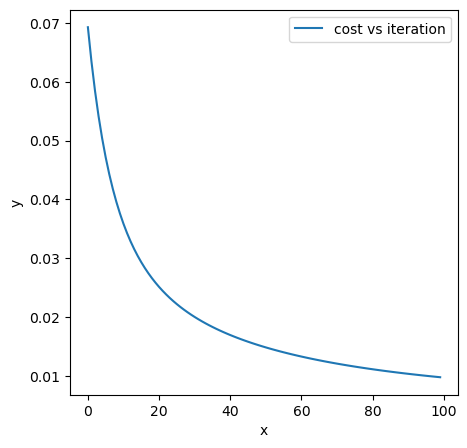

In [49]:
j_history = parameters["cost" + str(1)]
fig,ax = plt.subplots(1,1,figsize = (5,5))
ax.plot(j_history[:100],label = 'cost vs iteration')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend()
plt.show()

In [40]:
y_pred = predict(x_train,y_train)

In [41]:
print(y_pred)

[9. 4. 1. ... 9. 2. 0.]


In [42]:
print(y_train)

[8 4 1 ... 9 4 6]


In [43]:
acc = accuracy(y_train,y_pred)

In [44]:
print(acc)

72.06333333333333
